# Image classification using CNN (CIFAR10 dataset)

we will do small image classification using CIFAR10 dataset in tensorflow. We will use convolutional neural network for this image classification problem. First we will train a model using simple artificial neural network and then check how the performance looks like and then we will train a CNN and see how the model accuracy improves.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

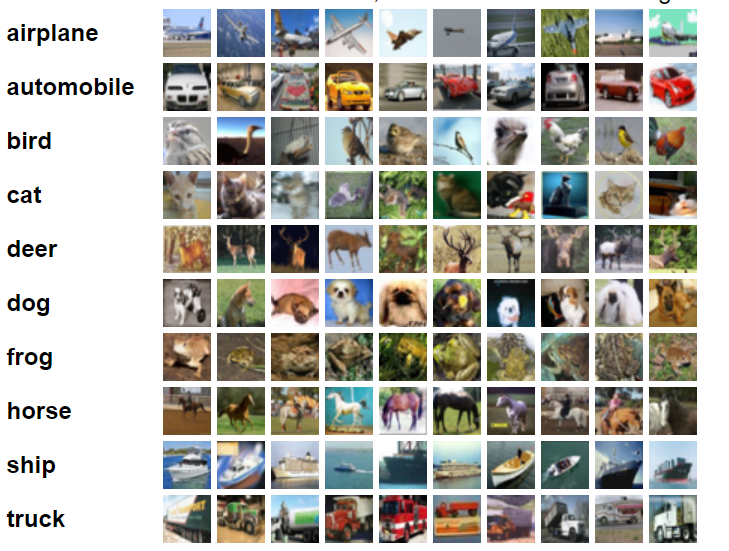

### import required libraries

In [22]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### load cifar10 from dataset

##### https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_train.shape

(50000,)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(classes)

10

In [10]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

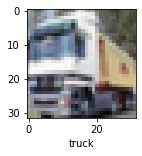

In [11]:
plot_sample(x_train,y_train,1)

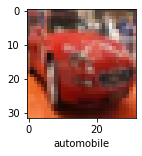

In [14]:
plot_sample(x_train,y_train,5)

In [15]:
x_train = x_train/255
x_test = x_test/255

### Model with ANN

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8111 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6251 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5405 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4837 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 123s 79ms/step - loss: 1.4345 - accuracy: 0.4941


In [17]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4735 - accuracy: 0.4698


[1.473540186882019, 0.4697999954223633]

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

y_predict = ann.predict(x_test)
y_predict_classes = [np.argmax(element) for element in y_predict]
print('Classification report: \n',classification_report(y_test, y_predict_classes))

313/313 [==============================] - 5s 15ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.64      0.58      0.61      1000
           2       0.46      0.12      0.19      1000
           3       0.42      0.23      0.29      1000
           4       0.29      0.69      0.41      1000
           5       0.47      0.29      0.36      1000
           6       0.58      0.39      0.47      1000
           7       0.52      0.51      0.52      1000
           8       0.59      0.66      0.62      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [26]:
cnn = models.Sequential([
        # cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        # dense 
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 32ms/step - loss: 1.4691 - accuracy: 0.4712
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1111 - accuracy: 0.6134
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9823 - accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9047 - accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8407 - accuracy: 0.7074
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7848 - accuracy: 0.7271
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7389 - accuracy: 0.7436
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7000 - accuracy: 0.7578
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6619 - accuracy: 0.7705
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [29]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9119 - accuracy: 0.7016


[0.9119150638580322, 0.7016000151634216]

In [31]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [33]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [36]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [39]:
y_pred[0]

array([4.83061932e-03, 2.05575780e-05, 6.91244891e-03, 7.77769208e-01,
       2.50315294e-03, 1.22643255e-01, 8.61076231e-04, 2.40797177e-03,
       8.19687620e-02, 8.29710989e-05], dtype=float32)

In [40]:
np.argmax(y_pred[0])

3

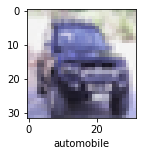

In [47]:
plot_sample(x_test,y_test,9)

In [44]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.86      0.76      0.81      1000
           2       0.63      0.58      0.60      1000
           3       0.49      0.55      0.52      1000
           4       0.62      0.71      0.66      1000
           5       0.57      0.66      0.61      1000
           6       0.86      0.67      0.75      1000
           7       0.75      0.77      0.76      1000
           8       0.78      0.82      0.80      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [51]:
classes[y_pred_classes[9]]

'automobile'